In [1]:
import torch 

from torchvision import models
import torch.nn as nn

from train import test
from torchvision.datasets import ImageFolder
from dataset import DogCatDataset
import torchvision.transforms as transforms 
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

In [2]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

In [3]:
# load homework required resnet50
model = models.resnet50(pretrained=True)

# for finetuning => set requires_grad = False
for param in model.parameters():
    param.requires_grad = False

num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)
model.to(device)

PATH = './models/resNet50.model'
model.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))


<All keys matched successfully>

In [4]:
# load homework required resnet50
re_model = models.resnet50(pretrained=True)

# for finetuning => set requires_grad = False
for param in re_model.parameters():
    param.requires_grad = False

num_features = re_model.fc.in_features
re_model.fc = nn.Linear(num_features, 2)
re_model.to(device)

PATH = './models/resNet50_re.model'
re_model.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))

<All keys matched successfully>

In [5]:
criterion = nn.CrossEntropyLoss()

In [6]:
dataset = ImageFolder("./train/")
train_data, test_data, train_label, test_label = train_test_split(
    dataset.imgs, 
    dataset.targets, 
    test_size=0.2, 
    random_state=3048
)


# use transform to transform the image to a specific formula
trans = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


train_set = DogCatDataset(train_data, trans)
test_set = DogCatDataset(test_data, trans)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

In [7]:
before_re_acc = test(model, criterion, test_loader, device)

Average Loss: 3.0417364627055576e-08 Accuracy: 3581/3638 98.43320505772402%


In [8]:
after_re_acc = test(re_model, criterion, test_loader, device)

Average Loss: 9.908014180837199e-05 Accuracy: 3556/3638 97.7460142935679%


In [9]:
import matplotlib.pyplot as plt

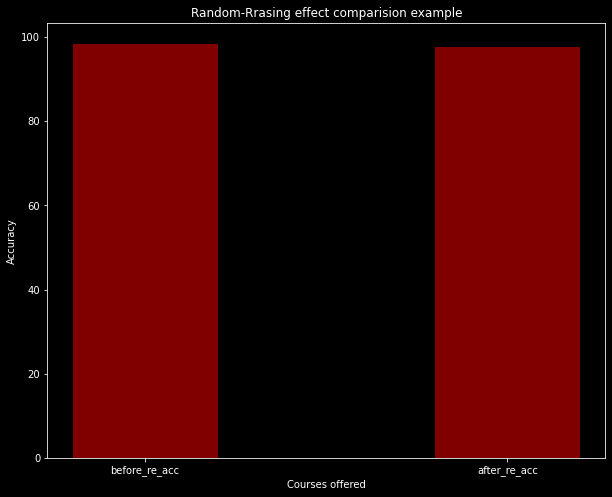

In [11]:
result = {
    'before_re_acc': before_re_acc,
    'after_re_acc': after_re_acc
}
keys = list(result.keys())
values = list(result.values())
plt.style.use('dark_background')
fig = plt.figure(figsize = (10, 8))

# creating the bar plot
plt.bar(keys, values, color ='maroon',
        width = 0.4)
 
plt.ylabel("Accuracy")
plt.title("Random-Rrasing effect comparision example")
plt.show()